# Лабораторная работа 9

Понижение размерности признакового пространства

Выполнил: Новицкий Никита (6132-010402D)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from warnings import filterwarnings

filterwarnings("ignore")

Найти датасет (желательно датасет для многоклассовой классификации, либо дадасет из предыдущей работы с результатами кластеризации) с большим количеством вещественных признаков (от 20-ти шт.). Добавьте описание датасета (в случае большого количества однотипных признаков, достаточно краткое описание на ваше усмотрение).

Набор данных: https://www.kaggle.com/datasets/cnic92/200-financial-indicators-of-us-stocks-20142018?select=2018_Financial_Data.csv

In [2]:
df = pd.read_csv("2018_Financial_Data.csv", index_col="Unnamed: 0")

In [3]:
print(f"Размерность данных: {df.shape}")

Размерность данных: (4392, 224)


In [4]:
df.sample(5)

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
ARNC,1.401400e+10,0.0813,1.139700e+10,2.617000e+09,103000000.0,6.040000e+08,1.292000e+09,1.325000e+09,378000000.0,8.680000e+08,...,0.0902,0.0048,-0.0013,0.1306,-0.0751,-0.055,-0.1552,Industrials,66.732920,1
RIG,3.018000e+09,0.0151,1.799000e+09,1.219000e+09,0.0,1.880000e+08,2.470000e+09,-1.251000e+09,620000000.0,-1.768000e+09,...,0.0134,0.1340,0.1452,-0.1383,0.3491,0.000,0.2051,Energy,-3.641453,0
SMFG,3.334687e+10,0.1036,0.000000e+00,3.334687e+10,0.0,1.585950e+10,3.985003e+10,-6.503166e+09,0.0,8.654141e+09,...,0.0000,0.0000,-0.0257,0.0404,-0.0188,0.000,0.0029,Financial Services,16.086369,1
JJSF,1.138265e+09,0.0498,8.019790e+08,3.362860e+08,0.0,2.254430e+08,2.255110e+08,1.107750e+08,-1110000.0,1.181520e+08,...,0.0625,0.0931,0.0747,0.1133,-0.1342,0.000,0.0581,Consumer Defensive,32.276555,1
AXU,1.472593e+07,0.7467,1.024296e+07,4.482963e+06,0.0,9.014815e+06,1.094296e+07,-6.460000e+06,0.0,-5.180741e+06,...,2.0789,-0.0346,0.0254,-0.0835,0.0000,0.000,0.0488,Industrials,141.666665,1


In [5]:
df.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
count,4.346000e+03,4253.000000,4.207000e+03,4.328000e+03,4.155000e+03,4.226000e+03,4.208000e+03,4.357000e+03,4.208000e+03,4.321000e+03,...,4067.000000,4268.000000,4160.000000,4178.000000,4121.000000,4128.000000,4133.000000,4144.000000,4392.000000,4392.000000
mean,5.119287e+09,3.455278,3.144946e+09,2.043954e+09,1.180176e+08,9.005022e+08,1.435546e+09,6.541207e+08,1.001350e+08,5.584432e+08,...,0.006081,36.768524,0.183066,1.389013,0.262530,9.928446,0.091891,0.153610,20.803948,0.693534
std,2.049504e+10,195.504906,1.508813e+10,7.682369e+09,9.330891e+08,3.661116e+09,5.529831e+09,2.969341e+09,3.780021e+08,2.639327e+09,...,0.239653,2347.079237,4.688013,35.123904,5.612666,363.717734,0.823281,0.839647,82.622147,0.461078
min,-6.894100e+07,-3.461500,-2.669055e+09,-1.818220e+09,-1.042000e+08,-1.401594e+08,-4.280000e+09,-1.455700e+10,-1.408252e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-0.999100,-32.258100,-1.000000,-1.000000,-1.000000,-99.864779,0.000000
25%,6.501425e+07,0.000000,3.415500e+06,3.618903e+07,0.000000e+00,2.056226e+07,4.223644e+07,-5.510000e+06,0.000000e+00,-1.000800e+07,...,0.000000,-0.048075,0.000000,-0.036700,-0.108600,-0.082850,0.000000,-0.004650,-7.477173,0.000000
50%,4.982640e+08,0.074900,1.741180e+08,2.219470e+08,0.000000e+00,9.390450e+07,1.806253e+08,4.203800e+07,5.693500e+06,2.730700e+07,...,0.000000,0.010200,0.000000,0.034750,0.026100,0.000000,0.000000,0.065700,17.639393,1.000000
75%,2.457878e+09,0.188500,1.297814e+09,9.767015e+08,1.450150e+07,4.117162e+08,6.796040e+08,2.862690e+08,5.817075e+07,2.238810e+08,...,0.042050,0.185900,0.080050,0.160575,0.138400,0.115425,0.009700,0.167625,39.625879,1.000000
max,5.003430e+11,12739.000000,3.733960e+11,1.269470e+11,2.883700e+10,1.065100e+11,1.065100e+11,7.089800e+10,9.168000e+09,7.290300e+10,...,4.079100,153332.333300,293.473000,1184.993800,313.395800,17646.823500,36.898100,43.718800,3756.716345,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4392 entries, CMCSA to ZYME
Columns: 224 entries, Revenue to Class
dtypes: float64(222), int64(1), object(1)
memory usage: 7.5+ MB


Визуализируйте точки из исходного признакового пространства в 2-мерном пространстве двух признаков, используя алгоритм t-SNE (sklearn.manifold.TSNE). Цвет точек пусть отражает метки классов (или номера кластеров из предыдущей работы).

In [7]:
df["Sector"], _ = pd.factorize(df["Sector"])
df = df.fillna(df.mean())
X = df.drop("Class", axis=1)

In [8]:
%%time
_TSNE = TSNE(n_components=2, n_iter=250)
_TSNE_DATA = _TSNE.fit_transform(X)

CPU times: user 20.4 s, sys: 2.69 s, total: 23.1 s
Wall time: 3.34 s


<AxesSubplot:title={'center':'TSNE'}>

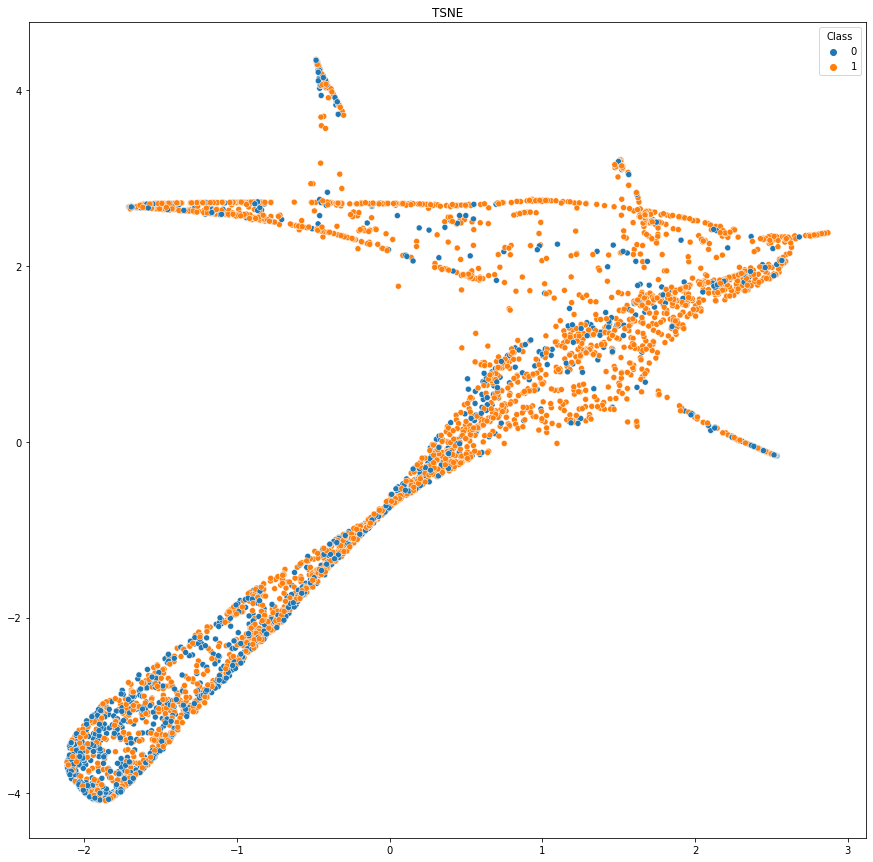

In [9]:
plt.figure(figsize=(15,15))
plt.title("TSNE")
sns.scatterplot(x=_TSNE_DATA[:, 0], y=_TSNE_DATA[:, 1], hue=df["Class"])

Визуализируйте точки из исходного признакового пространства в 2-мерном пространстве, используя метод главных компонент (sklearn.decomposition.PCA) или Truncated SVD (sklearn.decomposition.TruncatedSVD). Цвет точек пусть отражает метки классов (или номера кластеров из предыдущей работы).

In [10]:
%%time
_PCA = PCA(n_components=2)
_PCA_DATA = _PCA.fit_transform(X)

CPU times: user 125 ms, sys: 32.3 ms, total: 158 ms
Wall time: 30.8 ms


<AxesSubplot:title={'center':'PCA'}>

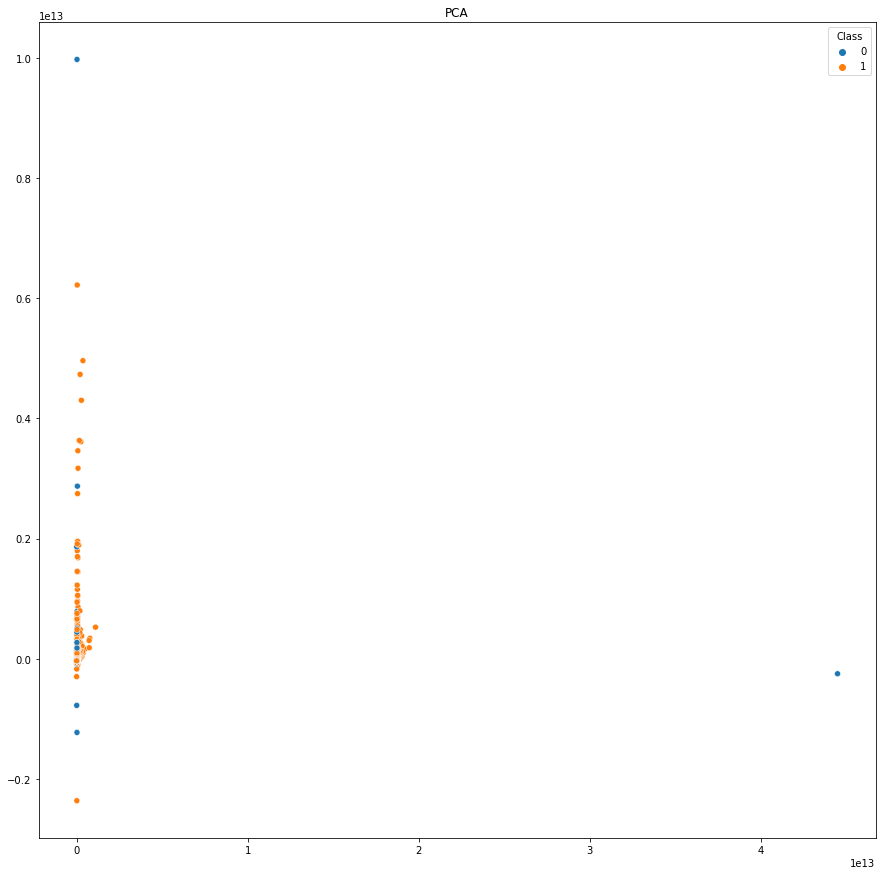

In [11]:
plt.figure(figsize=(15,15))
plt.title("PCA")
sns.scatterplot(x=_PCA_DATA[:, 0],y=_PCA_DATA[:, 1], hue=df["Class"])

In [12]:
%%time
_TSVD = TruncatedSVD(n_components=2 ,n_iter=777)
_TSVD_DATA = _TSVD.fit_transform(X)

CPU times: user 8.99 s, sys: 1.06 s, total: 10 s
Wall time: 1.34 s


<AxesSubplot:title={'center':'TruncatedSVD'}>

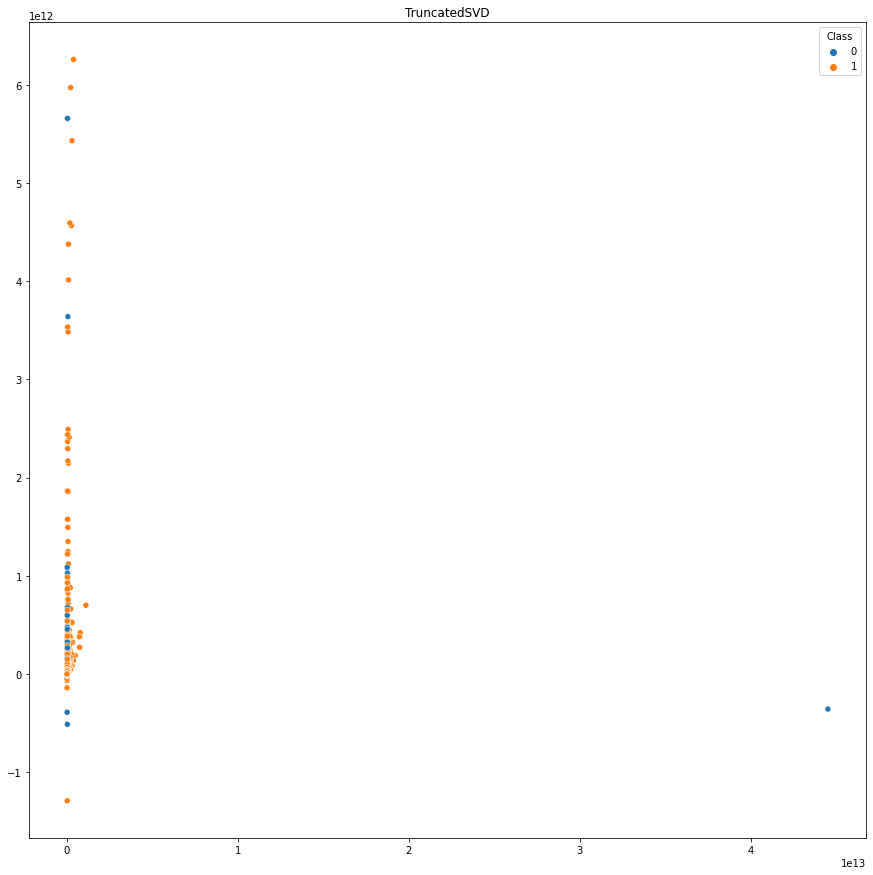

In [13]:
plt.figure(figsize=(15, 15))
plt.title("TruncatedSVD")
sns.scatterplot(x=_TSVD_DATA[:, 0], y=_TSVD_DATA[:, 1], hue=df["Class"])

На практике, как правило, выбирают столько главных компонент, чтобы оставить 90% дисперсии исходных данных. Чтобы оценить необходимое количество компонент, постройте график Number of components / Total explained variance. Пример построения есть в статье от ODS.

In [14]:
C_Ratio = PCA().fit(X).explained_variance_ratio_ * 100

In [15]:
C_Ratio.shape

(223,)

Text(0, 0.5, 'Explained variance ratio')

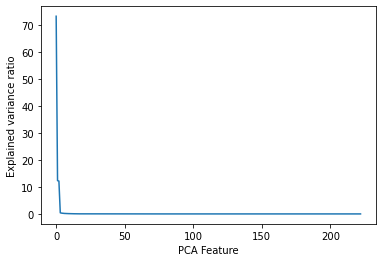

In [16]:
plt.plot(range(C_Ratio.size), C_Ratio)
plt.xlabel("PCA Feature")
plt.ylabel("Explained variance ratio")

Text(0, 0.5, 'Total explained variance ratio')

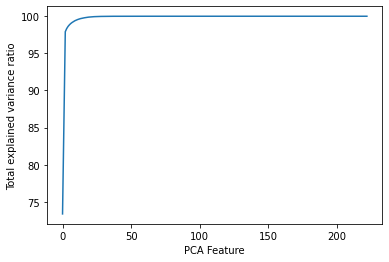

In [17]:
plt.plot(range(C_Ratio.size), np.cumsum(C_Ratio))
plt.xlabel("PCA Feature")
plt.ylabel("Total explained variance ratio")

Используя любой алгоритм классификации, исследуйте влияние понижения размерности признакового пространства на качество классификации. Обучите модель, используя все признаки,затем обучите модель после понижения признаковго пространства. Сравните метрики качества двух моделей. Сделайте выводы. Для выполнения данного задания набор данных можете взять новый.

In [18]:
RFC = RandomForestClassifier()
scaler = StandardScaler()

In [19]:
X, y = df.drop(columns=["Class"], axis=1), df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=1)

In [20]:
%%time
_pipe = make_pipeline(scaler, RFC)
_pipe.fit(X_train, y_train)
predidct = _pipe.predict(X_test)
print(f"Score on Train: {_pipe.score(X_train, y_train)}")
print(f"Score on Test: {_pipe.score(X_test, y_test)}")

Score on Train: 1.0
Score on Test: 0.9919069296914517
CPU times: user 1.39 s, sys: 94.9 ms, total: 1.48 s
Wall time: 1.12 s


In [21]:
%%time

for i in range(1, 11):
    print(f"Iteration: {i}")
    _pipe = make_pipeline(scaler, PCA(n_components=i), RFC)
    _pipe.fit(X_train, y_train)
    predict = _pipe.predict(X_test)
    print(f"Score on Train: {_pipe.score(X_train, y_train)}")
    print(f"Score on Test: {_pipe.score(X_test, y_test)}")
    print("------------------------------")

Iteration: 1
Score on Train: 0.9995859213250518
Score on Test: 0.6140617096611026
------------------------------
Iteration: 2
Score on Train: 0.9917184265010351
Score on Test: 0.6686899342438037
------------------------------
Iteration: 3
Score on Train: 0.9995859213250518
Score on Test: 0.6868993424380374
------------------------------
Iteration: 4
Score on Train: 0.9995859213250518
Score on Test: 0.6863935255437532
------------------------------
Iteration: 5
Score on Train: 0.9991718426501035
Score on Test: 0.7000505816894285
------------------------------
Iteration: 6
Score on Train: 0.9991718426501035
Score on Test: 0.6965098634294385
------------------------------
Iteration: 7
Score on Train: 0.9991718426501035
Score on Test: 0.6960040465351542
------------------------------
Iteration: 8
Score on Train: 0.9975155279503105
Score on Test: 0.7126960040465351
------------------------------
Iteration: 9
Score on Train: 0.9979296066252588
Score on Test: 0.7172483560950936
--------------

<AxesSubplot:>

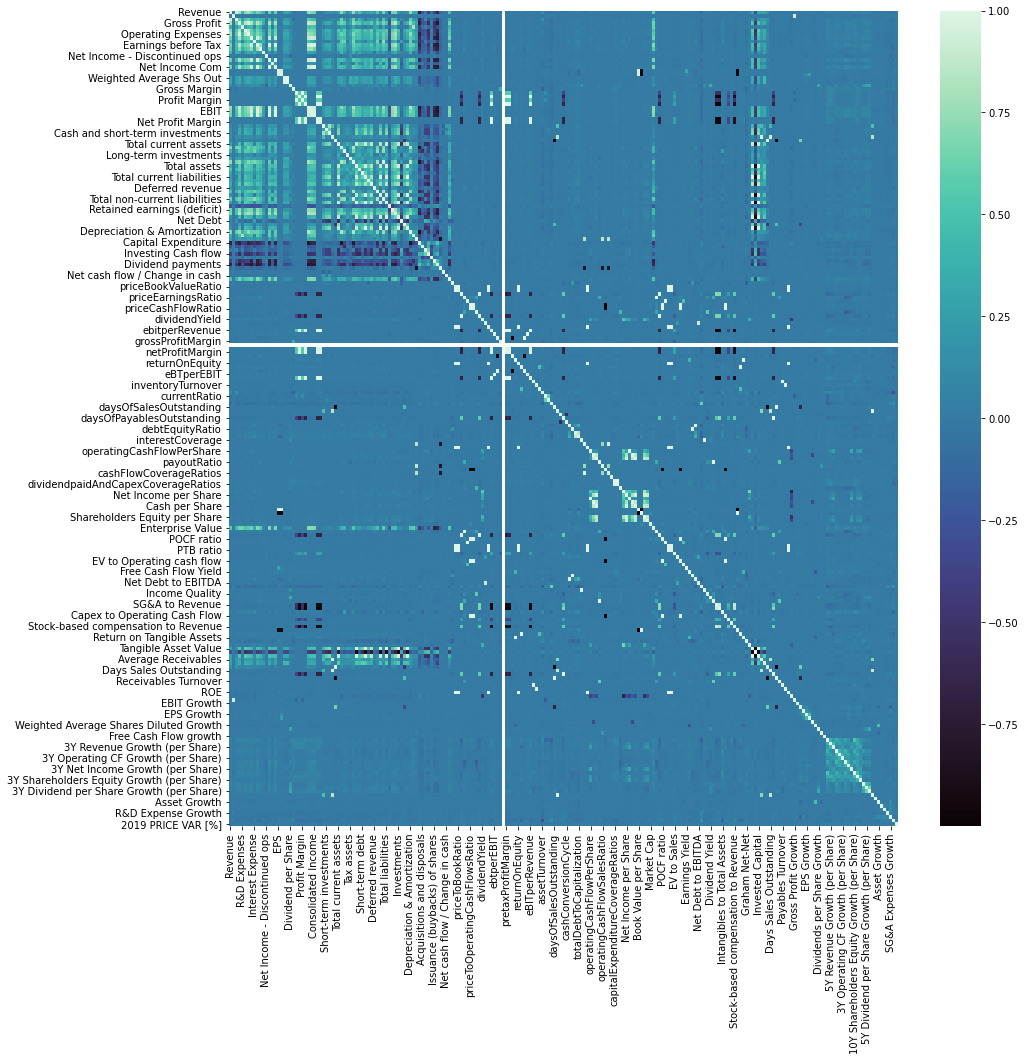

In [22]:
plt.figure(figsize=(15, 15))
sns.heatmap(X.corr(), cmap="mako")